In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
import json 
import pandas as pd 
import numpy as np 
try:
    sys.path.remove("../py_src") # Hacky way to add higher directory to python modules path. 
except:
    pass
sys.path.append("../py_src") # Means that I dont have to make src/ a proper python package

# Low SNR, pulsar terms

Plotting this many files: 10
Extracting data from file:  /Users/t1/github_repos/StateSpacePTA/data/dir_eg_canonical_bias_exploration_n2000/eg_canonical_bias_exploration_n2000_pulsar_5e-15_1245_result.json
The evidence is: 585621.7586821065
The number of samples is: 19638
Variable/Injection/Median
omega_gw 500.0 498.5317576599102
phi0_gw 0.2 0.3315921169758327
psi_gw 2.5 2.3981149762222973
iota_gw 1.0 0.7535982374012794
delta_gw 1.0 0.8188010201687795
alpha_gw 1.0 0.9037856819100063
h 5.0 3.2358831354345563
-------------------------------
VARS TO PLOT ARE: ['omega_gw', 'phi0_gw', 'psi_gw', 'iota_gw', 'delta_gw', 'alpha_gw', 'h']
The error in the 1D posteriors is as follows:
$10^9 \Omega$ 0.0030526740643777683 1.7553163655418142
$\Phi_0$ 0.8730909294302363 0.21863709058942232
$\psi$ 0.0517408233092934 0.16167732058793408
$\iota$ 0.3234257932036651 0.3836707451110216
$\delta$ 0.1831304242553047 0.20782356377561365
$\alpha$ 0.16349956647416838 0.21762656699920674
$10^{15} h_0$ 0.3336465519

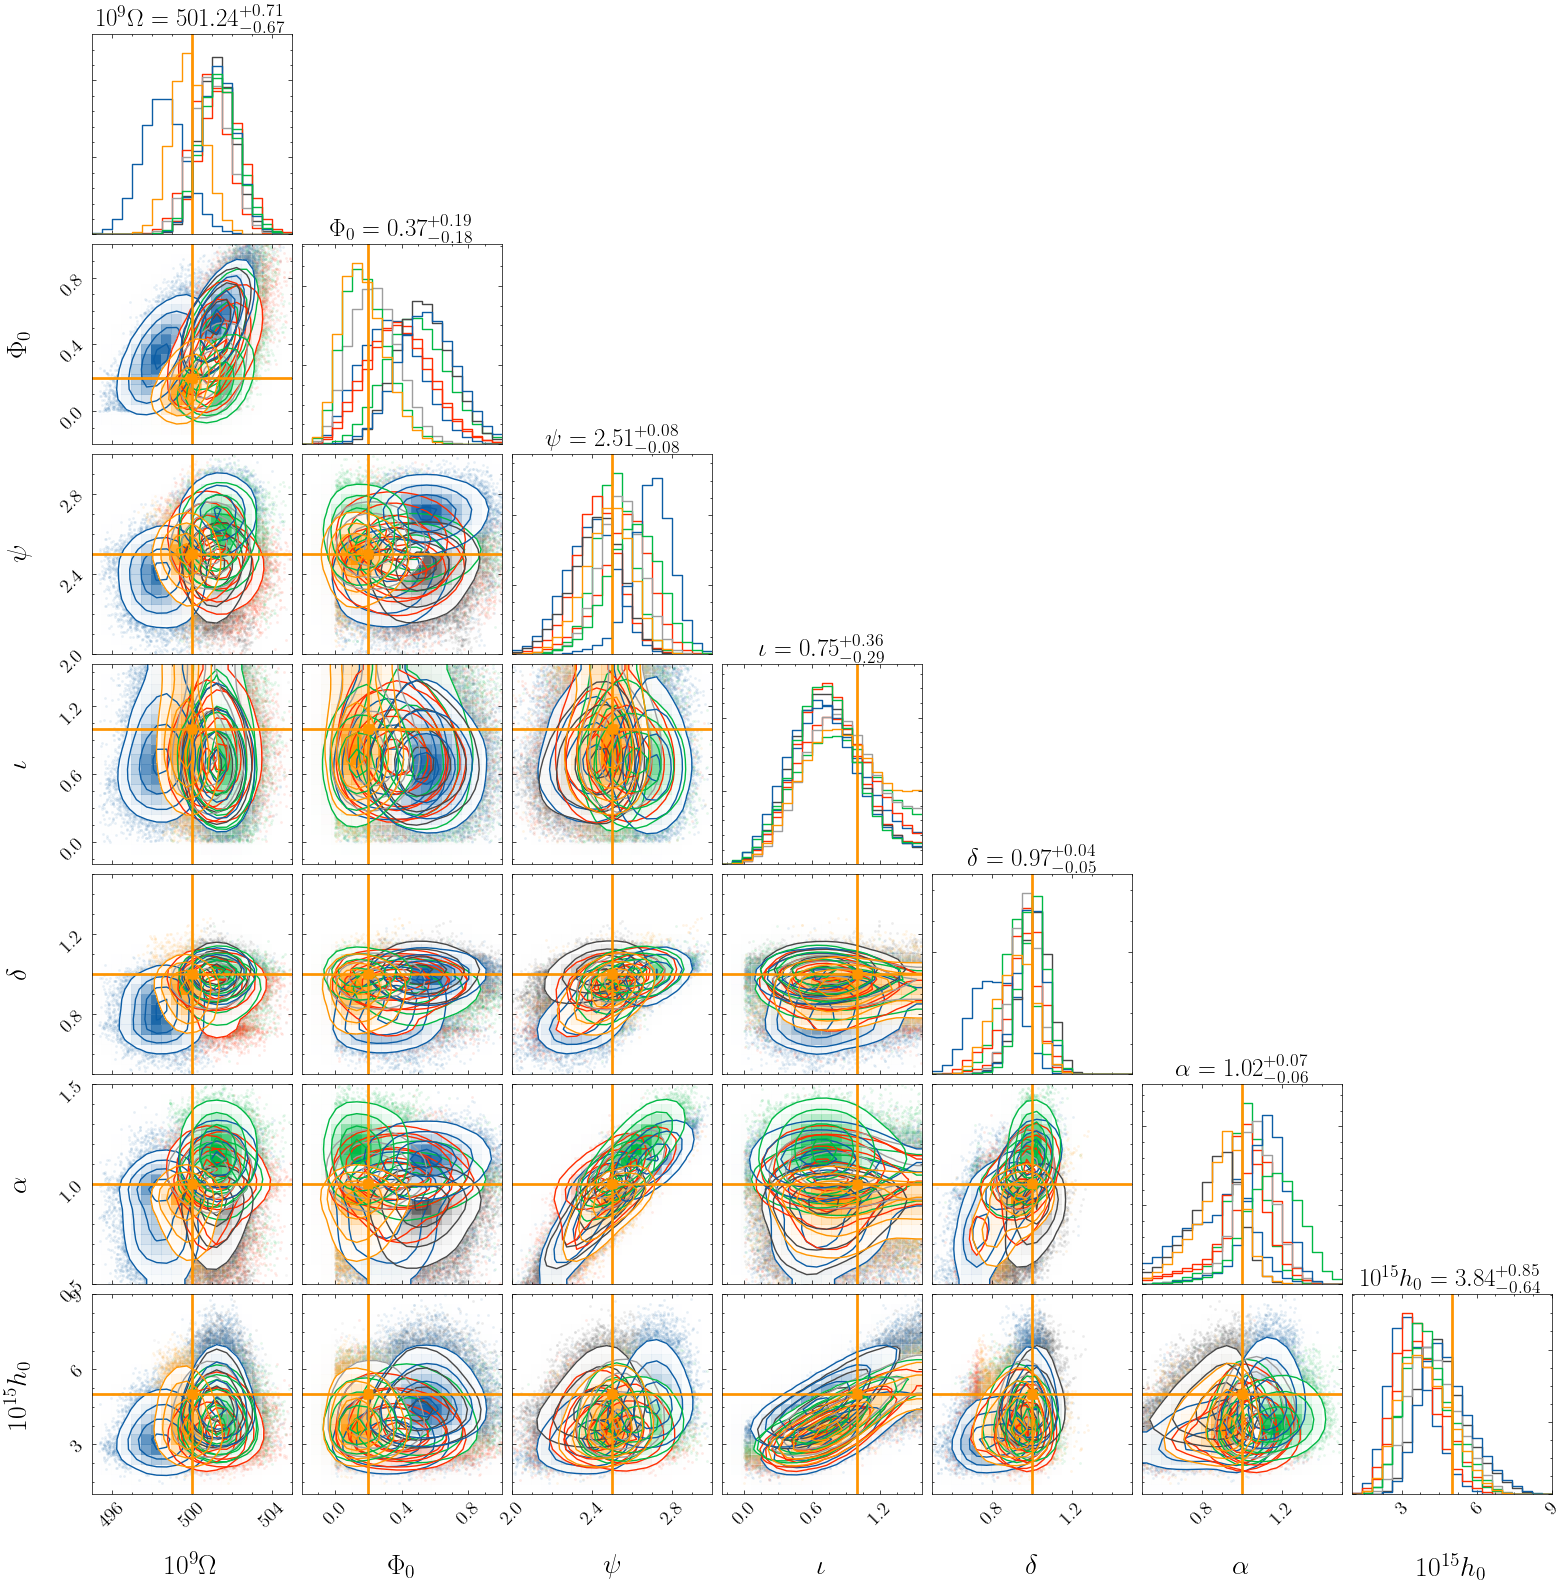

In [3]:

import glob 
from plotting import stacked_corner


#default values of GW parameters
ranges=[(4.95e-7,5.05e-7),(-0.2,1.0),(2.0,3.0),(-0.2,np.pi/2),(0.5,1.5),(0.5,1.5),(1e-15,9e-15)]


#ranges = None
injection_parameters = [5e-7,0.20,2.50,1.0,1.0,1.0,5e-15]
labels = [r'$10^9 \Omega$',r'$\Phi_0$',r'$\psi$',r'$\iota$', r'$\delta$',r'$\alpha$',r'$10^{15} h_0$']
variables_to_plot = ["omega_gw","phi0_gw","psi_gw","iota_gw","delta_gw","alpha_gw", "h"]
axes_scales = None

list_of_files = sorted(glob.glob('/Users/t1/github_repos/StateSpacePTA/data/dir_eg_canonical_bias_exploration_n2000/*_pulsar_5e-15*')) #all the low snr pulsar results

#or select manually
#idx = 10
#list_of_files = list_of_files[idx:idx+10]
#list_of_files = ['/Users/t1/github_repos/StateSpacePTA/data/nested_sampling/compressed_files/bigrun_pulsar_5e-15_1300']

number_of_files_to_plot = len(list_of_files)
print("Plotting this many files:", number_of_files_to_plot)
#Corner plot of GW parameters
fig = stacked_corner(list_of_files,
                   number_of_files_to_plot,
                   variables_to_plot,
                   labels,
                   injection_parameters,
                   ranges,
                   axes_scales,
                   scalings = [1e9,1e15], #the scalings for omega and h
                   savefig='corner_lowSNR',
                   smooth=True,smooth1d=True)


